In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import math
import numpy as np
from viznet import connecta2a, node_sequence, NodeBrush, EdgeBrush, DynamicShow

class Node():
  def __init__(self, precedingNodes, nodeWeights, nodeValue=0):
    self.nodeValue = nodeValue #nodeValue is probably 0 for non-initial nodes
    self.nodeList = precedingNodes #edgeList length is 0 for initial Nodes
    self.nodeWeights = nodeWeights
    for i in range(len(nodeWeights)):
      self.nodeWeights[i] = int(self.nodeWeights[i])

  def setPred(self,x):
    self.nodeList = x

  def getValue(self, activation):
    # print(self)
    if self.nodeWeights:
      value = self.nodeWeights[-1] # the bias
      i = 0
      #doesn't iterate if edgeList length is 0
      while (i < len(self.nodeList)):
        # if multiple calculation methods are involved, 
        # change edgeList so that it stores the result of
        # those methods instead. E.g. [edge_1.getValue(), edge_2.getValue()]
        value += (self.nodeList[i].getValue(activation[:-1]) * self.nodeWeights[i])
        i = i + 1
    else:
      value = self.nodeValue
    # print(activation[-1])
    # print(value)
    return activation[-1](value)
  
  def __repr__(self):
    return ",".join([str(i) for i in self.nodeWeights])
  
  def __str__(self):
    return ",".join([str(i) for i in self.nodeWeights])

# Input layer
# # Two starter Nodes 
# node_1 = Node([], [], 1)
# node_2 = Node([], [], 2)
# node_22 = Node([], [], 2)

# Hidden layer
# # Two nodes feed into 3
# node_3 = Node([node_1, node_2, node_22], [1, 2, 1])
# node_32 = Node([node_1, node_2, node_22], [1, 2, 1])

# Output layer
# # Node 3 feeds into 4
# node_4 = Node([node_3, node_32], [4,1])

In [ ]:
class FFNN:
  def __init__(self):
    self.layers = [[]]
    self.bias = []
    self.activate = ['linear']
  
  def __repr__(self):
    return '\n'.join(['|'.join([str(x) for x in layer]) for layer in self.layers[:0:-1]])

  #FORMAT INPUTNYA
  # Baris 1 adalah structure, angka pertama dimensi input, angka terakhir dimensi output, sisanya dimensi hidden layer diantara
  # contoh : A B C D, A adalah dimensi input layer, B C dimensi hidden layer 1 dan 2, dan D dimensi output layer
  # Lalu diikuti weight berurut dari hidden layer pertama dst sampai output layer, 
  # jumlah float untuk weight hidden layer 2 adalah A+1 (+1 untuk bias) buah float diulang sebanyak B kali
  # contoh :
  # 1 2 2 1                                                     # komen di dalam komen
  # sigmoid relu relu                                           # activation function
  # 1 2                                                         # ini h11, karena input 1 dimensi, + bias jadi 2 buah float
  # 2 1                                                         # ini h12
  # 2 2 3                                                       # ini h21 karena h1 2 dimensi tambah bias, jadi 3 buah float
  # 2 1 2                                                       # ini h22
  # 1 2 3                                                       # ini o sama kaya h2, 2 dimensi h2 + bias jadi 3 buah float
  def readfile(self, filename):
    f = open('/content/drive/MyDrive/Testing/'+filename,'r')
    structure = f.readline().split(' ')
    for x in f.readline().split(' '):
      self.activate.append(x.replace('\n','')) 
    for i in range(len(self.activate)):
      self.activate[i] = func[self.activate[i]]
    for i in range(1,len(structure)):
      lay = []
      for x in range(int(structure[i])):
        arr = f.readline().split(' ')
        lay.append(Node(self.layers[-1], arr))
      self.layers.append(lay)
  
  def input(self, inputs):
    arr = []
    for inp in inputs:
      arr.append(Node([],[],inp))
    self.layers[0] = arr
    for nodes in self.layers[1]:
      nodes.setPred(self.layers[0])
    

  def predict(self):
    return [x.getValue(self.activate) for x in self.layers[-1]]
  
  def predictMultiple(self, arrInput):
    for i in arrInput:
      self.input(i)
      print(f"{i} => {self.predict()}")
    

  def draw_ffnn(self,ax):
    num_node_list= []
    for i in self.layers:
      num_node_list.append(len(i))
    print(self.layers)
    print(num_node_list)
    num_hidden_layer = len(num_node_list) - 2
    token_list = ['\sigma^z'] + \
        ['y^{(%s)}' % (i + 1) for i in range(num_hidden_layer)] + ['\psi']
    kind_list = ['nn.input'] + ['nn.hidden'] * num_hidden_layer + ['nn.output']
    radius_list = [0.3] + [0.2] * num_hidden_layer + [0.3]
    y_list = 1.5 * np.arange(len(num_node_list))

    seq_list = []
    for n, kind, radius, y in zip(num_node_list, kind_list, radius_list, y_list):
        b = NodeBrush(kind, ax)

        seq_list.append(node_sequence(b, n, center=(0, y)))

    eb = EdgeBrush('-->', ax)
    l = 0
    for st, et in zip(seq_list[:-1], seq_list[1:]):
      connecta2a(st, et, eb)
        
  def draw(self):
    with DynamicShow((10, 10), '_feed_forward.png') as d:
        self.draw_ffnn(d.ax)
        
def sigmoid(x):
    return round(1 / (1 + np.exp(-1*x)),0)

def relu(x):
    return np.maximum(0, x)

def linear(x):
    return x

def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

func = {
    "sigmoid" : sigmoid,
    "relu" : relu,
    "linear" : linear,
    "softmax" : softmax
}


In [ ]:
filename = 'tes.txt'
ff = FFNN()
ff.readfile(filename)

ff.input([1,1])
print(str(ff.predict()))

ff.input([0,1])
print(str(ff.predict()))

ff.input([1,0])
print(str(ff.predict()))

ff.input([0,0])
print(str(ff.predict()))


[0.0]
[1.0]
[1.0]
[0.0]


[[, ], [20,20,-10, -20,-20,30], [20,20,-30]]
[2, 2, 1]
Press `c` to save figure to "_feed_forward.png", `Ctrl+d` to break >>
> /usr/local/lib/python3.7/dist-packages/viznet/context.py(61)__exit__()
-> plt.savefig(self.filename, dpi=300, transparent=True)
(Pdb) c


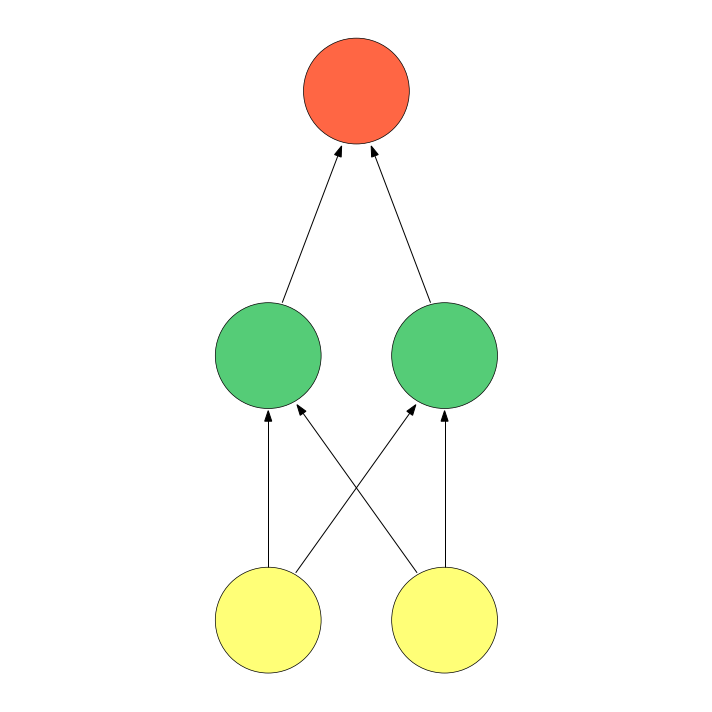

In [ ]:
ff.draw()